✅ OpenCV에서 검출한 등고선을 바탕으로 원과 타원을 검출합니다.

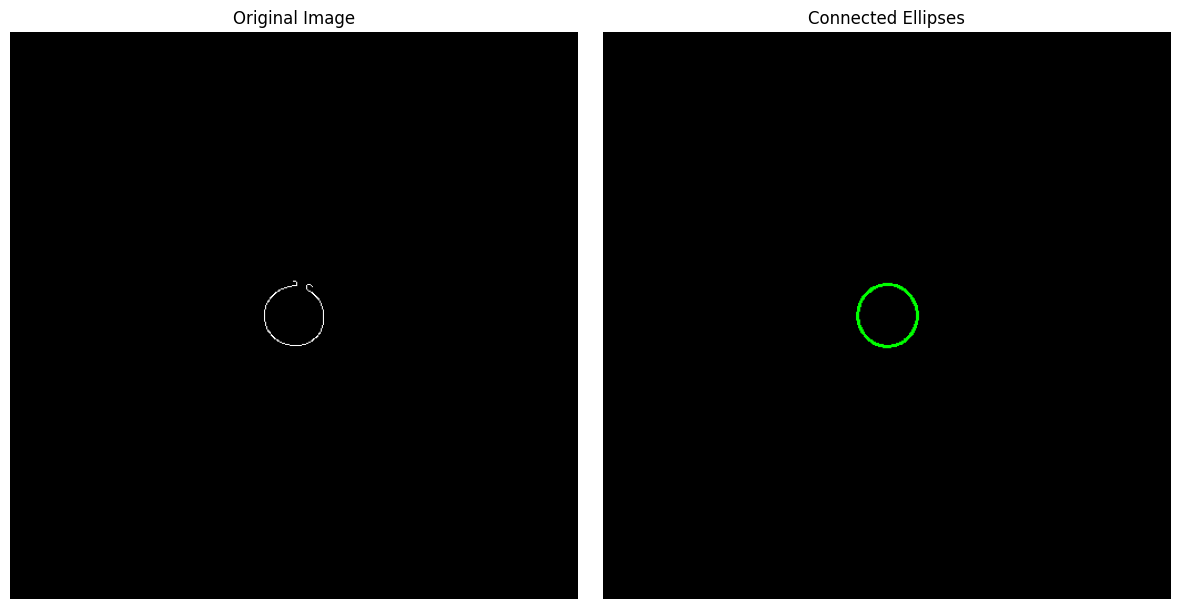

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 파일 경로
file_path = "201_connect_ellipse.png"

# 이미지 불러오기
image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

# 이진화 처리
_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# 등고선 찾기
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 중복된 타원을 제거하기 위해 설정할 허용 오차 값
center_tolerance = 10  # 중심 좌표 차이 허용 오차 (픽셀)
size_tolerance = 10    # 크기 차이 허용 오차 (축 길이 차이 허용 범위)

filtered_ellipses = []  # 유일한 타원을 저장할 리스트

# 빈 배경 생성 (원본 이미지 포함 X)
result_filtered = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

for contour in contours:
    if len(contour) >= 5:
        ellipse = cv2.fitEllipse(contour)
        x_new, y_new = ellipse[0]  # 중심 좌표
        major_new, minor_new = ellipse[1]  # 장축, 단축 길이

        # 기존 저장된 타원과 비교하여 중복 검사
        is_duplicate = False
        for existing_ellipse in filtered_ellipses:
            x_old, y_old = existing_ellipse[0]
            major_old, minor_old = existing_ellipse[1]

            # 중심과 크기 차이가 허용 오차 내이면 중복으로 판단
            if (abs(x_new - x_old) < center_tolerance and
                abs(y_new - y_old) < center_tolerance and
                abs(major_new - major_old) < size_tolerance and
                abs(minor_new - minor_old) < size_tolerance):
                is_duplicate = True
                break

        # 중복이 아니면 리스트에 추가하고 그림
        if not is_duplicate:
            filtered_ellipses.append(ellipse)
            cv2.ellipse(result_filtered, ellipse, (0, 255, 0), 2)  # 초록색 타원

# OpenCV BGR → RGB 변환 (Matplotlib에서 올바르게 표시하기 위함)
result_filtered_rgb = cv2.cvtColor(result_filtered, cv2.COLOR_BGR2RGB)

# Matplotlib로 원본과 결과 비교 출력
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(result_filtered_rgb)
ax[1].set_title("Connected Ellipses")
ax[1].axis("off")

plt.tight_layout()
plt.show()
